#Description: Lab 6_Visualizing Numbers
###(1)In this exercise, you will have the opportunity to use a dataset about avocado price modified from Kaggle: https://www.kaggle.com/datasets/neuromusic/avocado-prices. The columns are:


*   Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
*   city - the city or region of the observation
*   state - the state of the observation
*   region - the region of the observation
*   Total Volume - Total number of avocados sold
*   4046 - Total number of avocados with PLU 4046 sold
*   4225 - Total number of avocados with PLU 4225 sold
*   4770 - Total number of avocados with PLU 4770 sold
*   Small Bags: the number of small bags of avocados sold
*   Large Bags: the number of large bags of acocados sold
*   XLarge Bags: the number of extra large bags of avocado sold
*   Total Bags: the total bags of acovados sold

###(2) You are asked to create **five** visualizations using the avocado dataset 
###(3) One or more examples are provided for each type of visualizations


# Step 0: Import the data

In [ ]:
#0 we import the main packages we will be using: pandas
import pandas as pd
import seaborn as sns
import numpy as np
import io
import matplotlib.pyplot as plt
!pip install squarify # You need to install squarify because it is not a default package on Goolge CoLab
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## import avocado dataset using this if you are on colab
from google.colab import files
uploaded = files.upload()

In [ ]:
#read the csv file to a Pandas dataframe
data = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))
# Dataset is now stored in a Pandas Dataframe
# if you use Pytho notebook locally, you can use the following code to read the csv file in.
#data = pd.read_csv('avocado.csv')

# Step 1: Explore the data

In [ ]:
# 1.1 show information about the data
data.info()

In [ ]:
# 1.2 Because the Date column is not in Date Time data type, we change it here. 
data['Date']= pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            15210 non-null  int64         
 1   Date          15210 non-null  datetime64[ns]
 2   AveragePrice  15210 non-null  float64       
 3   Total Volume  15210 non-null  float64       
 4   4046          15210 non-null  float64       
 5   4225          15210 non-null  float64       
 6   4770          15210 non-null  float64       
 7   Total Bags    15210 non-null  float64       
 8   Small Bags    15210 non-null  float64       
 9   Large Bags    15210 non-null  float64       
 10  XLarge Bags   15210 non-null  float64       
 11  type          15210 non-null  object        
 12  year          15210 non-null  int64         
 13  city          15210 non-null  object        
 14  state         15210 non-null  object        
 15  region        15210 non-null  object

In [ ]:
# 1.3 returns the number of unique values for each column; another way to explore the data
data.nunique()

ID                 53
Date              169
AveragePrice      259
Total Volume    15199
4046            14756
4225            15071
4770             9520
Total Bags      15061
Small Bags      14297
Large Bags      12319
XLarge Bags      4395
type                2
year                4
city               45
state              26
region              4
dtype: int64

In [ ]:
# 1.2 print out first 10 rows of values in data. 
data.head(10)

,ID,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,city,state,region
0,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson,AZ,West
1,1,2015-12-20,0.53,1097224.25,785254.94,204147.30,10346.68,97475.33,72169.92,25305.41,0.0,conventional,2015,PhoenixTucson,AZ,West
2,2,2015-12-13,0.66,907470.09,546182.56,241774.69,9429.99,110082.85,92028.11,18054.74,0.0,conventional,2015,PhoenixTucson,AZ,West
3,3,2015-12-06,0.56,1105500.34,760680.02,271207.14,13354.80,60258.38,60255.64,2.74,0.0,conventional,2015,PhoenixTucson,AZ,West
4,4,2015-11-29,0.75,724915.60,449043.34,208439.29,9770.44,57662.53,57662.53,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West
5,5,2015-11-22,0.77,737834.48,441712.62,220374.84,11102.75,64644.27,63088.81,1555.46,0.0,conventional,2015,PhoenixTucson,AZ,West
6,6,2015-11-15,0.62,1010132.49,690246.77,244820.79,11412.94,63651.99,63178.20,473.79,0.0,conventional,2015,PhoenixTucson,AZ,West
7,7,2015-11-08,0.60,1102271.52,793103.44,234926.57,11555.39,62686.12,62666.63,19.49,0.0,conventional,2015,PhoenixTucson,AZ,West
8,8,2015-11-01,0.71,907452.21,592066.03,232050.89,20971.41,62363.88,62363.88,0.00,0.0,conventional,2015,PhoenixTucson,AZ,West
9,9,2015-10-25,0.83,761261.71,435986.90,240689.98,19968.66,64616.17,64585.35,30.82,0.0,conventional,2015,PhoenixTucson,AZ,West


In [ ]:
data.describe()

,ID,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,15210.000000,15210.000000,1.521000e+04,1.521000e+04,1.521000e+04,15210.000000,1.521000e+04,1.521000e+04,15210.000000,15210.000000,15210.000000
mean,24.236686,1.414417,3.416497e+05,1.080304e+05,1.248661e+05,11971.342963,9.678044e+04,7.619492e+04,18940.572384,1644.947716,2016.147929
std,15.483757,0.409132,8.137813e+05,3.163987e+05,3.063713e+05,43326.303124,2.342365e+05,2.035922e+05,51745.771433,7455.859071,0.939947
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000
25%,10.000000,1.110000,8.791110e+03,6.102375e+02,2.362540e+03,0.000000,3.646148e+03,1.841023e+03,68.325000,0.000000,2015.000000
50%,24.000000,1.370000,7.985215e+04,5.545655e+03,2.160699e+04,102.735000,2.724963e+04,1.839454e+04,1798.530000,0.000000,2016.000000
75%,38.000000,1.670000,3.204061e+05,8.241416e+04,9.855987e+04,3840.120000,8.644750e+04,6.723429e+04,12846.135000,66.292500,2017.000000
max,52.000000,3.250000,1.121360e+07,4.794142e+06,4.097592e+06,704466.560000,3.462626e+06,3.403581e+06,832296.700000,131300.760000,2018.000000


In [ ]:
# 1.3 calculate a correlation matrix for the data. More info: https://www.datacamp.com/tutorial/tutorial-datails-on-correlation 
data.corr()

,ID,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
ID,1.000000,-0.128733,0.025199,0.024416,0.032866,0.040376,0.004114,0.005847,-0.002118,-0.015718,-0.171549
AveragePrice,-0.128733,1.000000,-0.314974,-0.314636,-0.253627,-0.201510,-0.300275,-0.265661,-0.293761,-0.140555,0.095281
Total Volume,0.025199,-0.314974,1.000000,0.901598,0.921955,0.753863,0.911022,0.903936,0.468633,0.685453,0.025865
4046,0.024416,-0.314636,0.901598,1.000000,0.712348,0.552952,0.747555,0.761528,0.311828,0.526801,-0.002840
4225,0.032866,-0.253627,0.921955,0.712348,1.000000,0.779030,0.788776,0.777285,0.424075,0.612501,-0.015018
4770,0.040376,-0.201510,0.753863,0.552952,0.779030,1.000000,0.668247,0.631256,0.438571,0.712843,-0.035171
Total Bags,0.004114,-0.300275,0.911022,0.747555,0.788776,0.668247,1.000000,0.978377,0.571116,0.736829,0.119837
Small Bags,0.005847,-0.265661,0.903936,0.761528,0.777285,0.631256,0.978377,1.000000,0.390188,0.722777,0.101369
Large Bags,-0.002118,-0.293761,0.468633,0.311828,0.424075,0.438571,0.571116,0.390188,1.000000,0.347557,0.129101
XLarge Bags,-0.015718,-0.140555,0.685453,0.526801,0.612501,0.712843,0.736829,0.722777,0.347557,1.000000,0.100831


# Step 2: Create visualizations


*   You are required to create 5 visualizations
*   An example is given for each visualization



# 2.1 Line chart

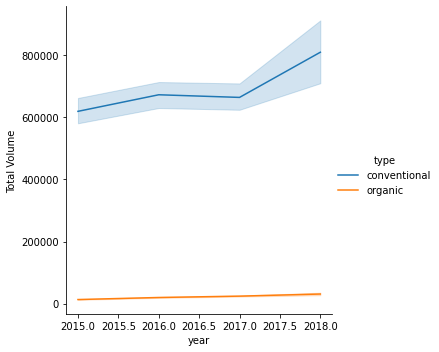

In [ ]:
# Line chart example - the number of totol volumes sold by year by avocado type. Note that we use the Seaborn library here. 
sns.relplot(data=data, kind='line',
            x='year', y='Total Volume', hue="type")

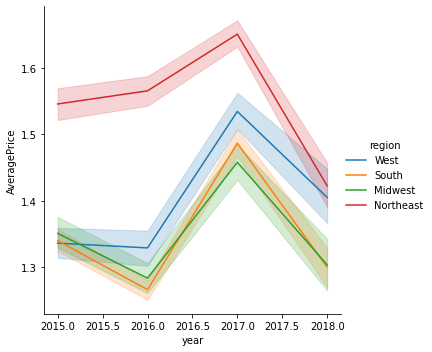

In [ ]:
# Line chart question: Please create a line chart that shows the averge price by year by region 
 
sns.relplot(data=data, kind="line",
            x="year", y="AveragePrice", hue="region")
# Hue created different colors for each rigion and also is what we group by 


# 2.2 Bar Chart

<AxesSubplot:xlabel='year'>

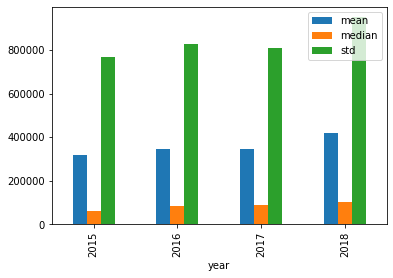

In [ ]:
#Bar chart example 1: Create a bar plot that shows the mean, median, and standard deviation of the Total Volume column by year
data1=data.groupby('year')['Total Volume'].agg(['mean','median','std'])
data1
data1.plot.bar()

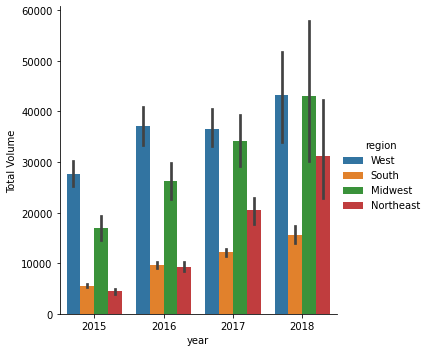

In [ ]:
#Bar chart example 2: Create a barchart using
# the total volume of organic avocadoes sold,
# grouping by region and year. Use region as 
#the color hue, and year as the x-axis
sns.catplot(data=data.query('type in ("organic")'),
            kind='bar', x='year', y='Total Volume', hue='region')

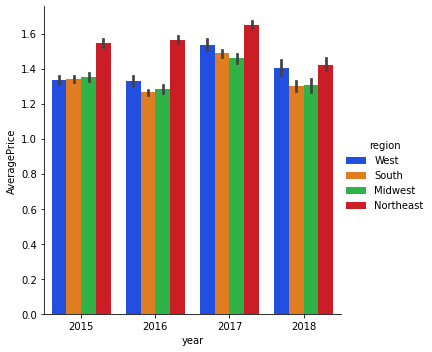

In [ ]:
# Bar chart question: Create a 
#grouped bar chart showing the Average Price of 
#avocadoes sold, grouping by region and year. 
#Use region as the color hue. Use color palette Set2. More info on color palette: https://seaborn.pydata.org/tutorial/color_palettes.html
bright=sns.color_palette('Set2')
sns.catplot(data=data, kind="bar", 
            x="year", y="AveragePrice", hue="region", palette="bright")



# 2.3 Showing distribution using histograms or boxplots

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

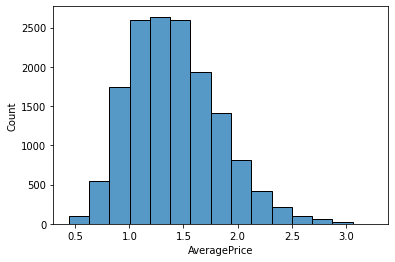

In [ ]:
# Histogram example: show the distribution of average price using 15 bins. 
data_hist = data['AveragePrice']
sns.histplot(data_hist,bins=15)


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

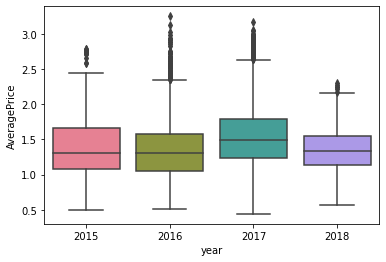

In [ ]:
# Boxplot example: 
# create grouped boxplot: show distribution of average price by year
# use this to plt.style.use("seaborn-white") set the basic style of visualizations
sns.boxplot(x = data['year'],
			y = data['AveragePrice'],
           palette='husl')


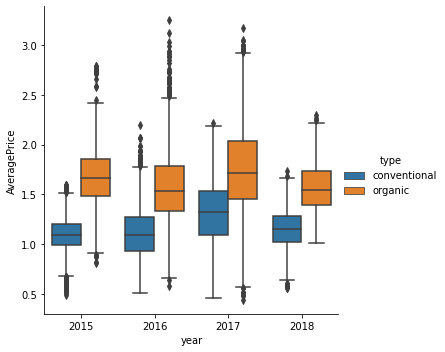

In [ ]:
# Boxplot Question (You are required to pick one from Boxplot or histogram): 
#create grouped boxplot to show the distribution of average price by year and by type of avocado
# (for color); You can choose any color pallete; You should see 8 boxes

sns.catplot(data=data, kind="box", x="year", 
            y="AveragePrice", hue="type")



<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

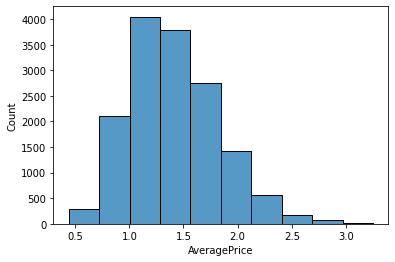

In [ ]:
# Histogram question (You are required to pick one from Boxplot or histogram): 
#create a histogram to show the average price distribution of different avocado types

data_hist = data['AveragePrice']
sns.histplot(data_hist,bins=10)


# Step 2.4 Scatterplot

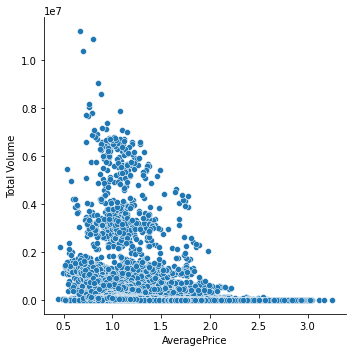

In [ ]:
# Scatterplot example 1: create a scatterplot for total volume and average price using a generic method in seaborn. More info: https://seaborn.pydata.org/generated/seaborn.relplot.html 
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume')

In [ ]:
#Scatterplot example 2: Create the same plot but with the hue parameter set to year and the dots for the total volume with their sizes proporitional to its value 
sns.relplot(data=data, kind='scatter', x='AveragePrice', y='Total Volume', hue='year',
           size='Total Volume')

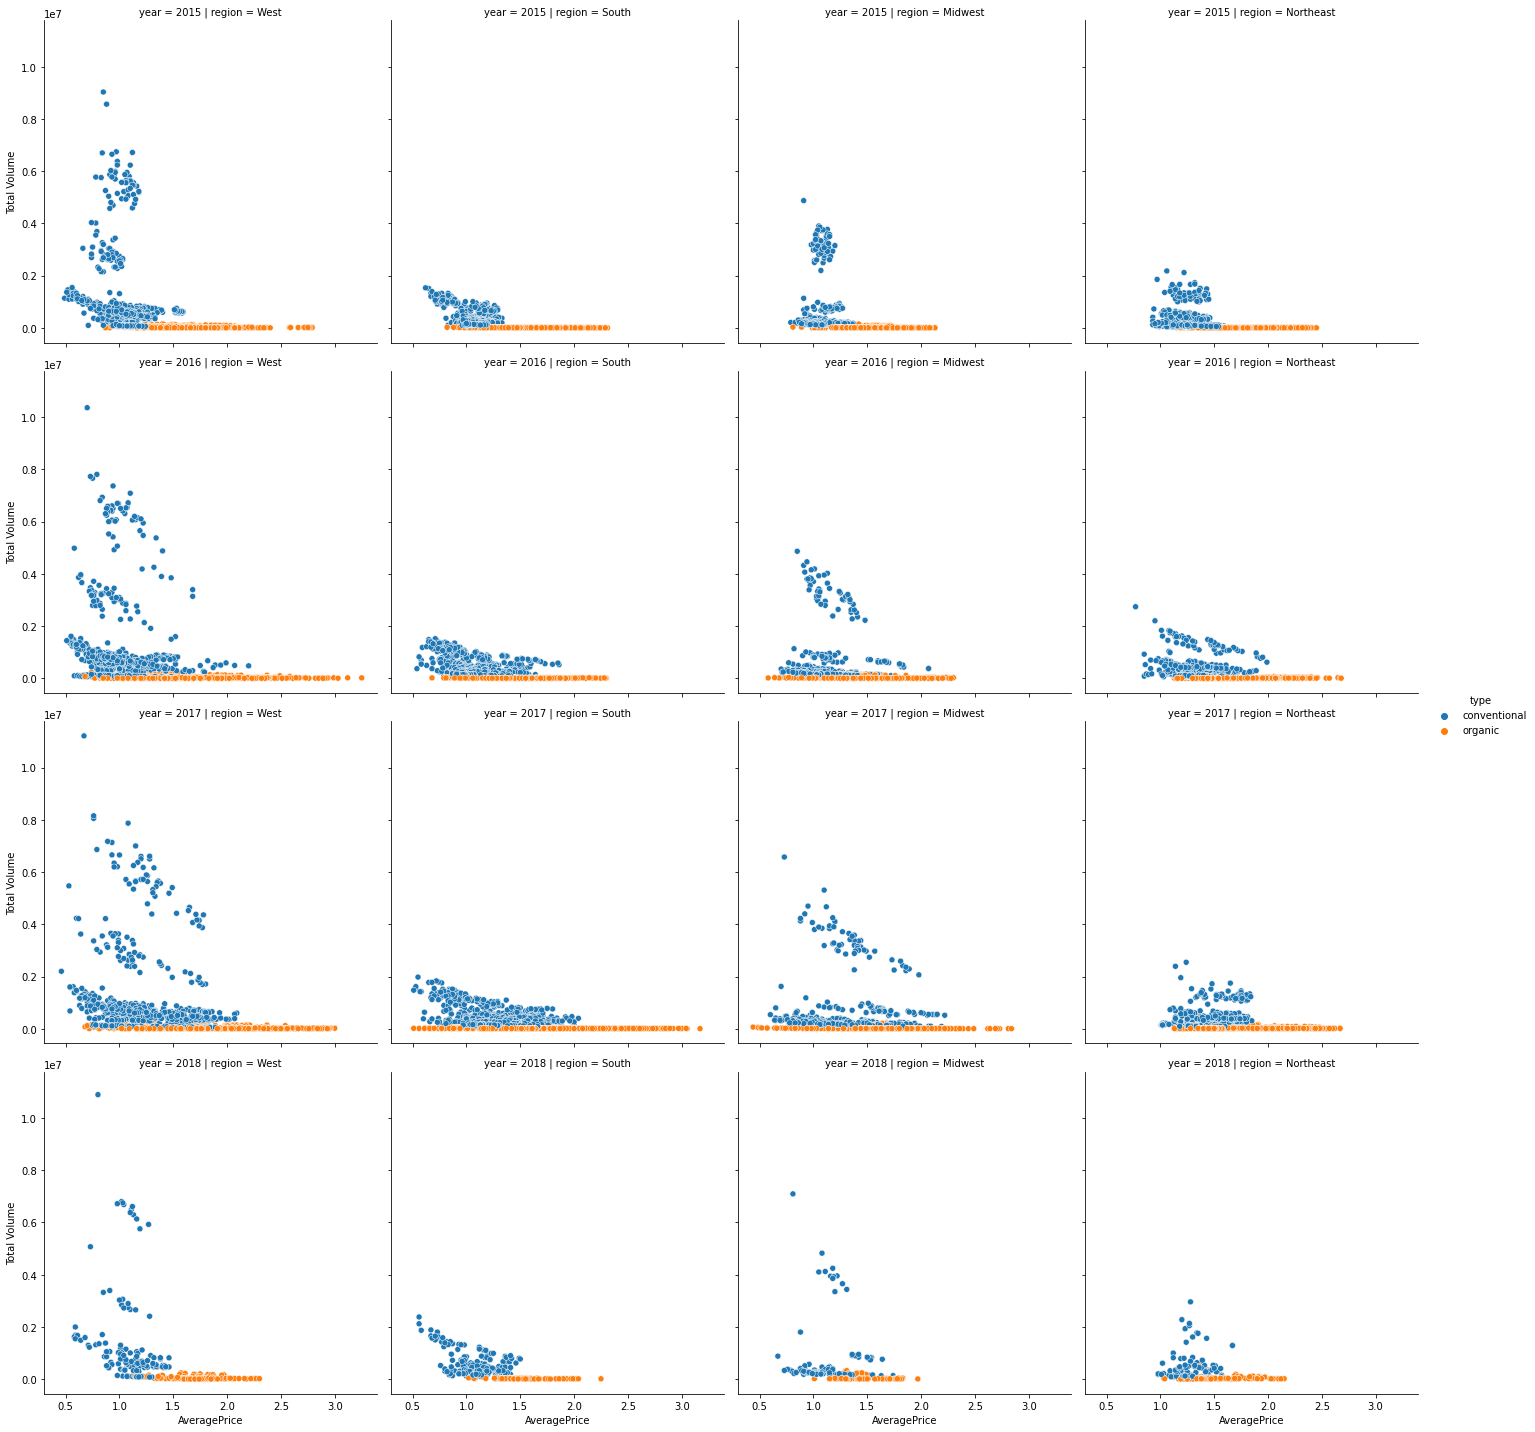

In [ ]:
#Scatterplot question: create a 4*4 scatterplot showing 
#the relationship between average price and total volume by year and region; each dot is color coded by avocado type
#Hints: you will use hue, col and row parameters for relplot function. 

sns.relplot(data=data, kind="scatter", 
            x="AveragePrice", y="Total Volume", 
            hue="type", col="region", row="year")


# Step 2.5 Treemap

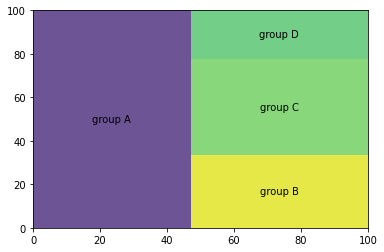

In [ ]:
# Treemap example: create a treemap with fake data
# Create a data frame with fake data
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
# plot it
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
#plt.axis('off')
plt.show()

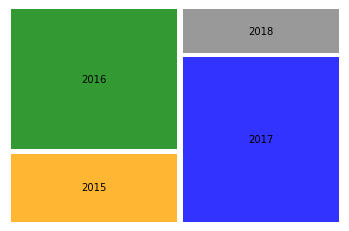

In [ ]:
# Treemap question: Creat a treemap showing the composition of total avocado sales by year. More info on colors: https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/
# group the nmber of bags sold by year
n = data.groupby('year')[['Total Bags']].sum()
#extract data and labels as lists
a = data.groupby('year')[['Total Bags']].sum().index.get_level_values(0).tolist()
#print(n)
squarify.plot(sizes=n.values, label=a, alpha=.8,color=["orange","green","blue", "grey"],pad=True)
plt.axis('off')
plt.show()

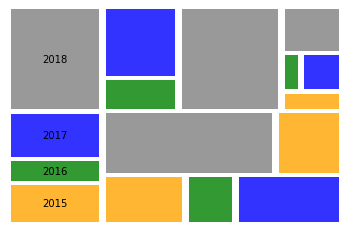

In [ ]:
# Treemap question: Creat a treemap showing the composition of avocado 
#sales by year by region
# Solutions:
n=data.groupby(["year", "region"])[["Total Volume"]].sum()
a=data.groupby("year") [["Total Volume"]].sum().index.get_level_values(0).tolist()
#print(n)
squarify.plot(sizes=n.values, label=a, alpha=.8,color=["orange","green","blue", "grey"],pad=True)
plt.axis('off')
plt.show()
# hint 1: you will need to group the nmber of bags sold by year and region


# Optional - additional exploration

In [ ]:
# 
#Filter the data so it contains just the rows for 2015, for the conventional type, and for the region named Northeast. Store just the Date, Total Bags, and Small Bags columns in a new DataFrame.
data_reduced = data.query('year == 2015 and region == "Northeast" and type == "conventional"')[['Date','Total Bags','Small Bags']]

In [ ]:
#Melt the data in the Total Bags and Small Bags columns, but not the values in the Date column. Name the column that contains the type of bag Bags, and name the column that contains the number of bags Count. Then, display the resulting DataFrame.
data_melted = pd.melt(data_reduced, id_vars='Date', value_vars=['Total Bags','Small Bags'],
                     var_name='Bags', value_name='Count')
data_melted

In [ ]:
## Plot the melted data with Seaborn in a line plot, using the hue parameter to distinguish between the bag types.
sns.relplot(data=data_melted, kind='line', x='Date', y='Count', hue='Bags')

In [ ]:
#Bin the data in the Total Volume column into four quantiles labeled ‘poor’, ‘modest’, ‘good’, and ‘excellent’, and store the bin labels in a new column.
data['Sales Volume'] = pd.qcut(data['Total Volume'], q=4, labels=['poor','modest','good','excellent'])
data

In [ ]:
# Plot the binned data by year using a Seaborn count plot.
sns.catplot(data=data, kind='count', x='year', hue='Sales Volume')

# The end of the assignment